Mounted at /content/drive

Epoch 1: val_loss improved from inf to 0.26430, saving model to ./model/01-0.2643.hdf5

Epoch 2: val_loss improved from 0.26430 to 0.26065, saving model to ./model/02-0.2606.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_loss improved from 0.26065 to 0.25683, saving model to ./model/03-0.2568.hdf5

Epoch 4: val_loss improved from 0.25683 to 0.25314, saving model to ./model/04-0.2531.hdf5

Epoch 5: val_loss improved from 0.25314 to 0.25066, saving model to ./model/05-0.2507.hdf5

Epoch 6: val_loss improved from 0.25066 to 0.24928, saving model to ./model/06-0.2493.hdf5

Epoch 7: val_loss improved from 0.24928 to 0.24863, saving model to ./model/07-0.2486.hdf5

Epoch 8: val_loss improved from 0.24863 to 0.24853, saving model to ./model/08-0.2485.hdf5

Epoch 9: val_loss did not improve from 0.24853

Epoch 10: val_loss did not improve from 0.24853

Epoch 11: val_loss did not improve from 0.24853

Epoch 12: val_loss improved from 0.24853 to 0.24828, saving model to ./model/12-0.2483.hdf5

Epoch 13: val_loss improved from 0.24828 to 0.24785, saving model to ./model/13-0.2479.hdf5

Epoch 14: val_loss improved from 0.24785 to 0.24724, saving model to ./model/14-0.2472.hdf5

Epoch 15: val_loss imp

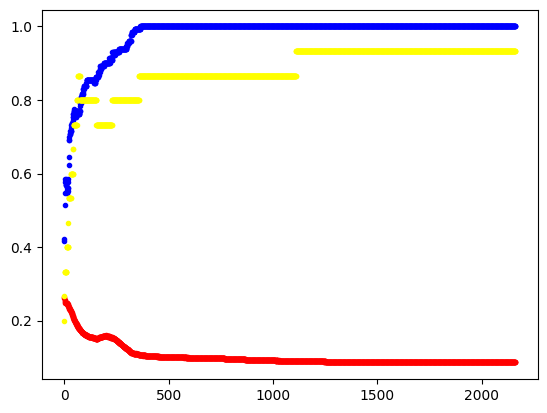

In [29]:
import pandas as pd
import numpy
import tensorflow as tf
import os
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint
from google.colab import drive

drive.mount("/content/drive", force_remount=True)


# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

df = pd.read_csv("/content/drive/MyDrive/080228-master/deeplearning/dataset/sonar.csv", header=None)
dataset = df.values # 벡터로 변환
X = dataset[:, 0:60].astype(float)
Y_obj = dataset[:, 60]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

# 학습셋과 테스트셋의 구분
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# 모델 저장 폴더 설정
MODEL_DIR = "./model"
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

# 모델 저장 조건 설정
modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True) # val_loss = 테스트셋 오차

# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

# 모델 실행
history = model.fit(X_train, Y_train, validation_split=0.1, epochs=3500, batch_size=500, verbose=0,
                    callbacks=[early_stopping_callback, checkpointer])

# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss = history.history['val_loss']

# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc = history.history['accuracy']

# 테스트셋으로 실험 결과의 정확도 값을 저장
y_vacc = history.history['val_accuracy']

# x 값을 지정하고 학습셋 정확도를 파란색, 테스트셋 오차를 빨간색, 테스트셋 정확도를 노란색으로 표시
x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)
plt.plot(x_len, y_vacc, "o", c="yellow", markersize=3)